# Flights Data Exploration Challenge

In this challenge, I will explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [3]:
# Your code to explore the data

Data Assessment and Cleaning

In [4]:
df_flights.shape

(271940, 20)

In [5]:
df_flights.duplicated().sum()

0

In [6]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [7]:
df_flights.query("DepDel15.isnull()==True")

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [8]:
df_flights.query("DepDelay==0")[["DepDelay","DepDel15"]]

,DepDelay,DepDel15
20,0,0.0
49,0,0.0
67,0,0.0
69,0,0.0
71,0,0.0
...,...,...
271858,0,0.0
271868,0,0.0
271885,0,NaN
271919,0,0.0


In [9]:
df_flights.query("DepDelay==0")["DepDel15"].isnull().sum()

2761

Now we have a reason for our nulls. All the nulls are in the DepDel15 column have 0 as the DepDelay.
The value 0 in thr DepDelay column shows that the corresponding flight was not delayed.

Cleaning: Filling the null values with 0 to remove nulls from the dataset

In [10]:
df_flights=df_flights.fillna(0)

In [11]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [12]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           271940 non-null  float64
 16  CR

In [13]:
numeric_features=[]
categorical_features=[]

for col in df_flights.columns:
    if df_flights[col].dtypes=="int64" :#or df_flights[col].dtypes=="floatt64":
        numeric_features.append(col)
    else:
        categorical_features.append(col)


In [14]:
import warnings
warnings.filterwarnings("ignore")

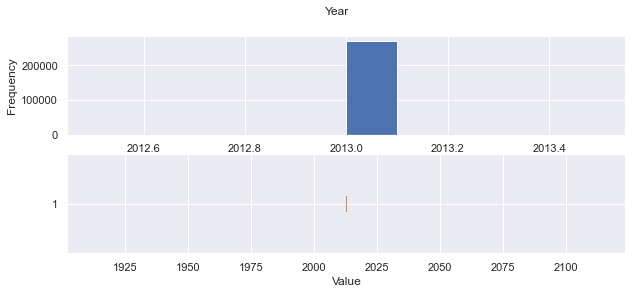

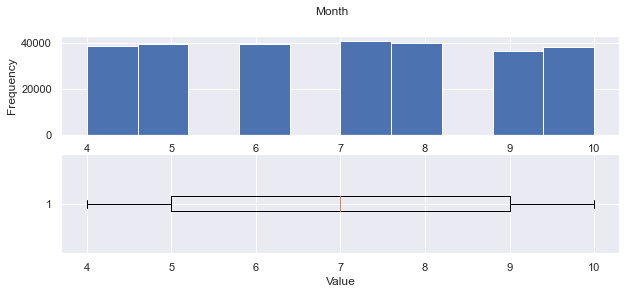

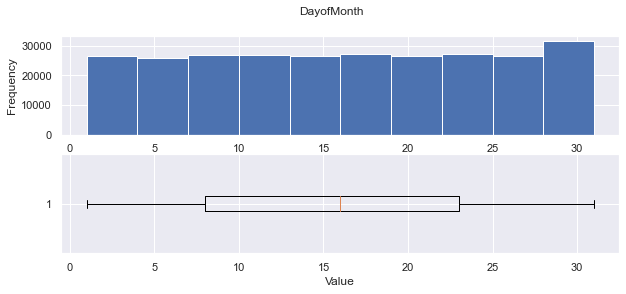

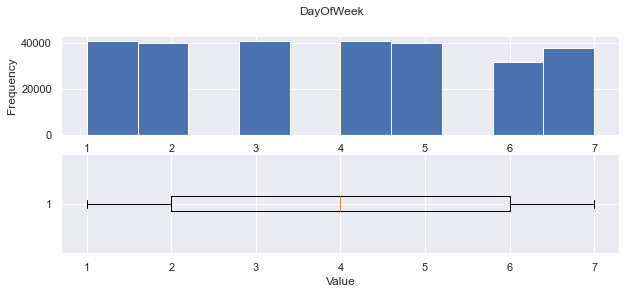

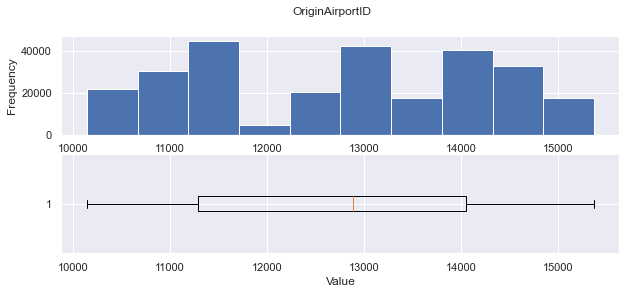

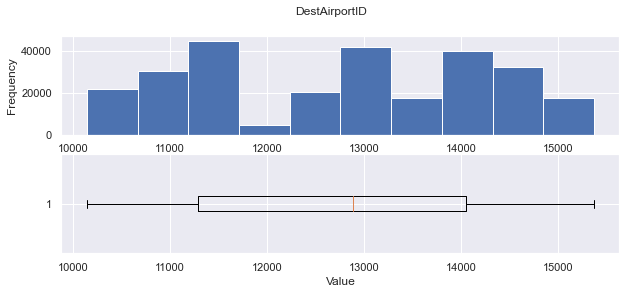

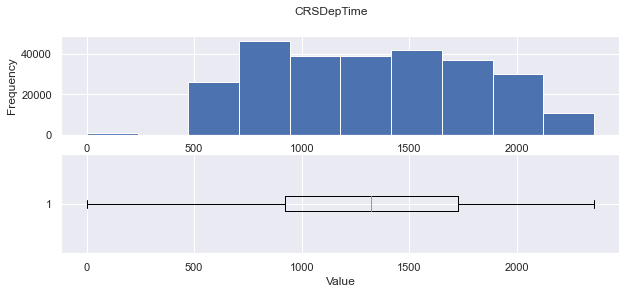

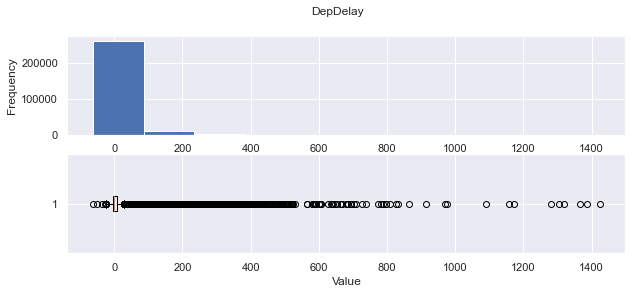

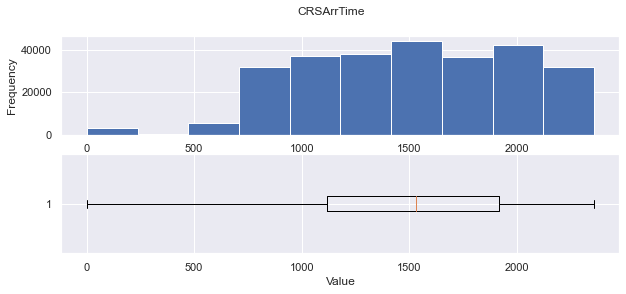

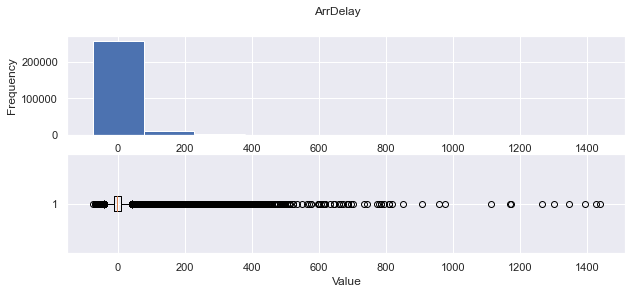

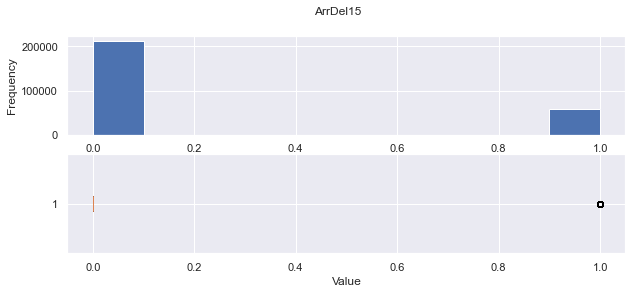

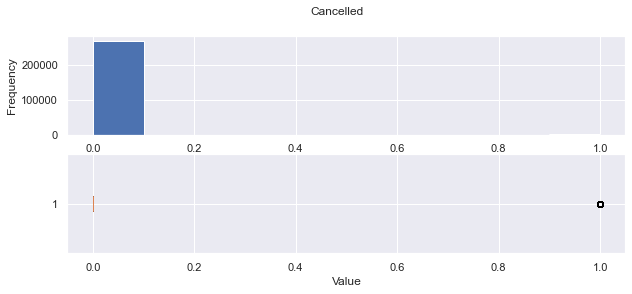

In [15]:

def show_outliers(col):
    plt.show
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    #histogram
    ax[0].hist(col)
    ax[0].set_ylabel('Frequency')

   
    #boxplot   
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('Value')

    
    fig.suptitle(col.name)

  
    fig.show()

for col in numeric_features:
    show_outliers(df_flights[col])

Insight: The DepDelay and ArrDelay shows presence of outliers. 

Further analysis on these columns.

In [16]:
outliers_in_cols=["DepDelay","ArrDelay"]

df_flights[outliers_in_cols].describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


In [17]:
#trimming data to sort of clean the columns better

arrDelay_q1=df_flights.ArrDelay.quantile(0.01)
arrDelay_q2=df_flights.ArrDelay.quantile(0.90)

df_flights=df_flights[df_flights.ArrDelay.between(arrDelay_q1,arrDelay_q2)]

depDelay_q1=df_flights.DepDelay.quantile(0.01)
depDelay_q2=df_flights.DepDelay.quantile(0.90)

df_flights=df_flights[df_flights.DepDelay.between(depDelay_q1,depDelay_q2)]

df_flights.shape


(217784, 20)

In [18]:
df_flights[outliers_in_cols].describe()

,DepDelay,ArrDelay
count,217784.000000,217784.000000
mean,-0.836246,-4.971031
std,5.947004,11.619321
min,-12.000000,-33.000000
25%,-5.000000,-13.000000
50%,-2.000000,-6.000000
75%,1.000000,2.000000
max,17.000000,38.000000


In [19]:
def box(col):
    sns.boxplot(col,data=df_flights)


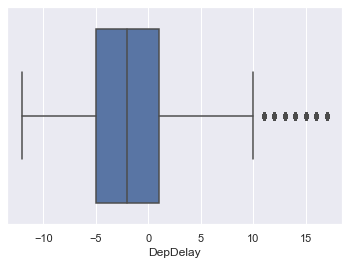

In [20]:
box("DepDelay")

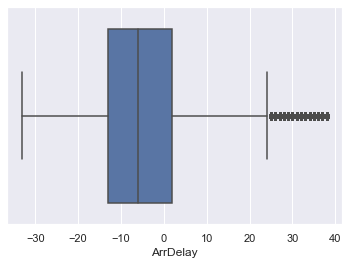

In [21]:
box("ArrDelay")

Looks a lot better!

Next is data exploration

### Data Exploration

In [22]:
#summary statistics of numeric features in the dataset

df_flights[numeric_features].describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,217784.0,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000,217784.000000
mean,2013.0,7.019124,15.794553,3.903078,12758.499403,12727.257604,1280.271030,-0.836246,1463.311993,-4.971031,0.071070,0.013031
std,0.0,2.006552,8.858875,1.997924,1509.603624,1505.963365,469.644867,5.947004,486.115964,11.619321,0.256943,0.113409
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-12.000000,1.000000,-33.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,1848.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,17.000000,2359.000000,38.000000,1.000000,1.000000


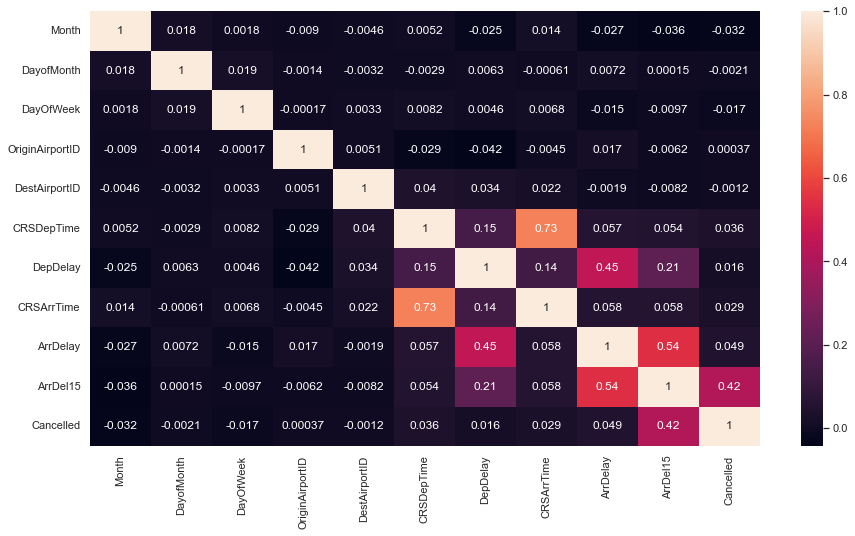

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
corr_df=df_flights[numeric_features].drop(columns=["Year"]).corr()

sns.heatmap(corr_df,annot=True);

##### What are the average (mean) departure and arrival delays?

In [24]:
for cols in outliers_in_cols:
    mean=df_flights[cols].mean().round(2)

    print(f"{cols}: {mean} ")

DepDelay: -0.84 
ArrDelay: -4.97 


#### #ow do the carriers compare in terms of arrival delay performance?

In [25]:
def plot(col):
    sns.boxplot(x=col,y="ArrDelay",data=df_flights)

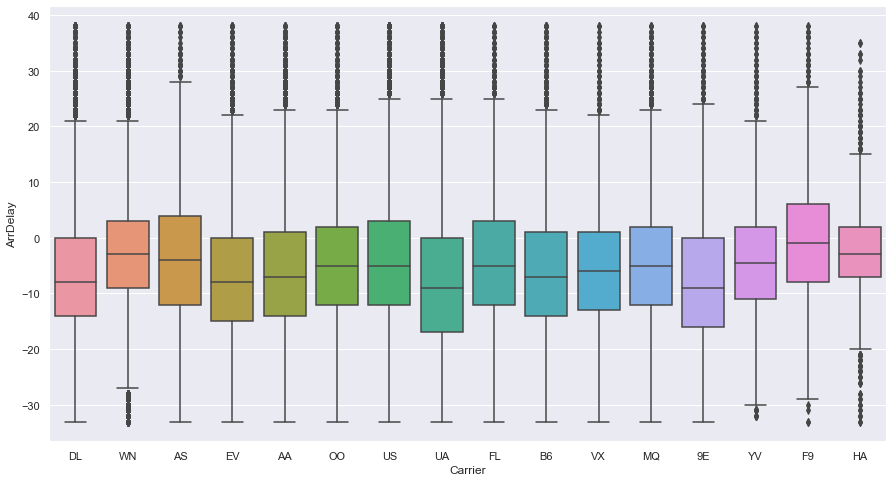

In [26]:
plot("Carrier")

##### Is there a noticable difference in arrival delays for different days of the week?

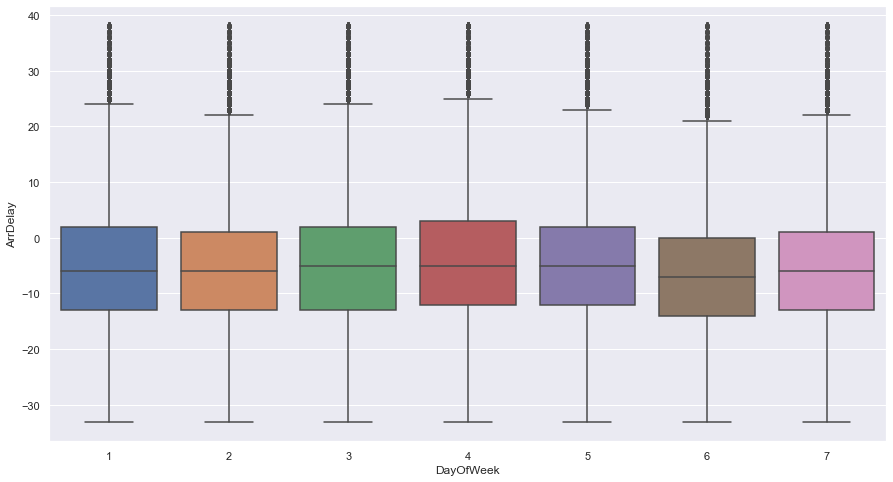

In [27]:
plot("DayOfWeek")

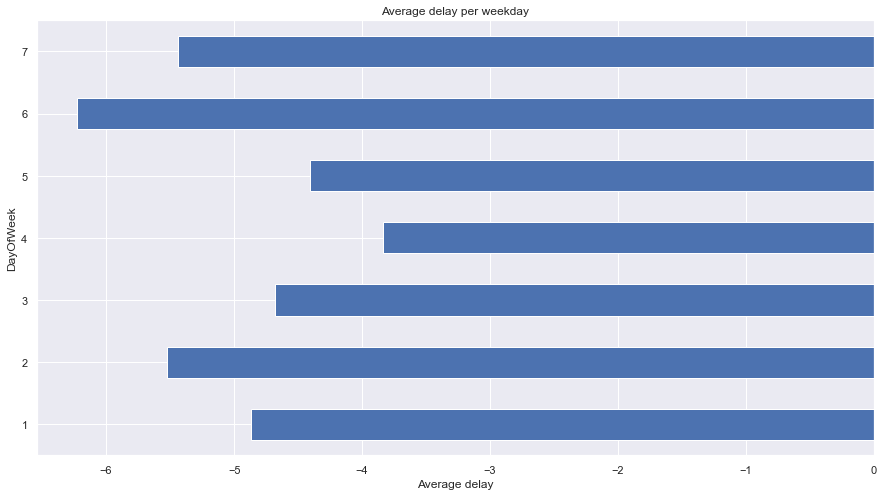

In [28]:
df_flights.groupby("DayOfWeek").mean()['ArrDelay'].plot(kind='barh')
plt.xlabel("Average delay")
plt.title("Average delay per weekday");

##### Which departure airport has the highest average departure delay?

In [29]:
df_flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

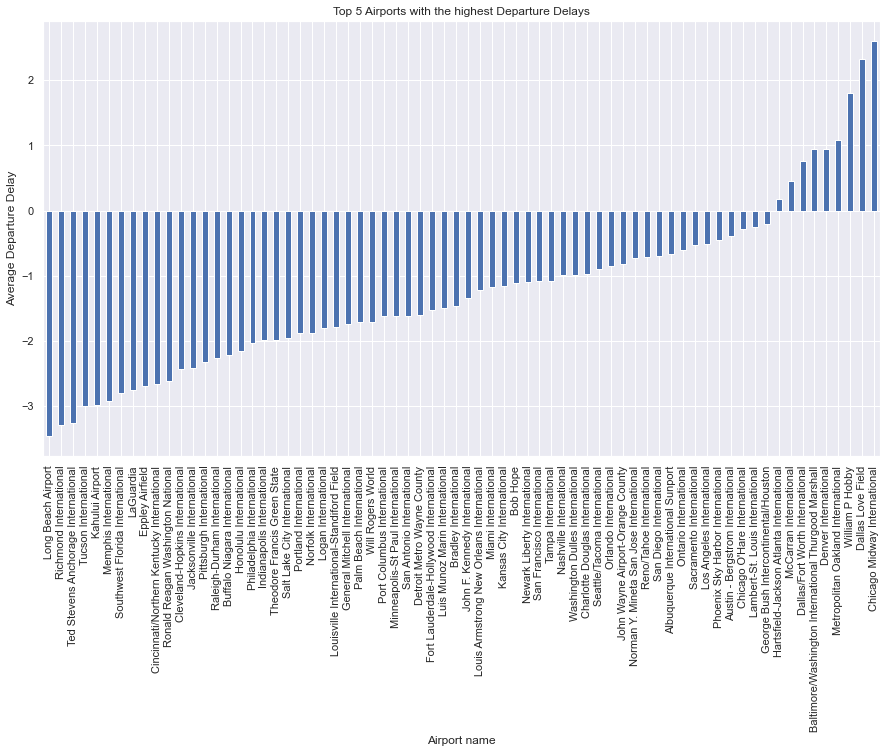

OriginAirportName
Long Beach Airport                    -3.462173
Richmond International                -3.293750
Ted Stevens Anchorage International   -3.265941
Tucson International                  -3.003171
Kahului Airport                       -2.983185
                                         ...   
Denver International                   0.946852
Metropolitan Oakland International     1.077142
William P Hobby                        1.805943
Dallas Love Field                      2.320488
Chicago Midway International           2.603017
Name: DepDelay, Length: 70, dtype: float64

In [30]:
df_flights.groupby("OriginAirportName").mean()['DepDelay'].sort_values().plot(kind='bar')
plt.xlabel("Airport name")
plt.ylabel("Average Departure Delay")
plt.title("Top 5 Airports with the highest Departure Delays")
plt.show();

highest=df_flights.groupby("OriginAirportName").mean()['DepDelay'].sort_values()
highest


##### Do **late** departures tend to result in longer arrival delays than on-time departures?

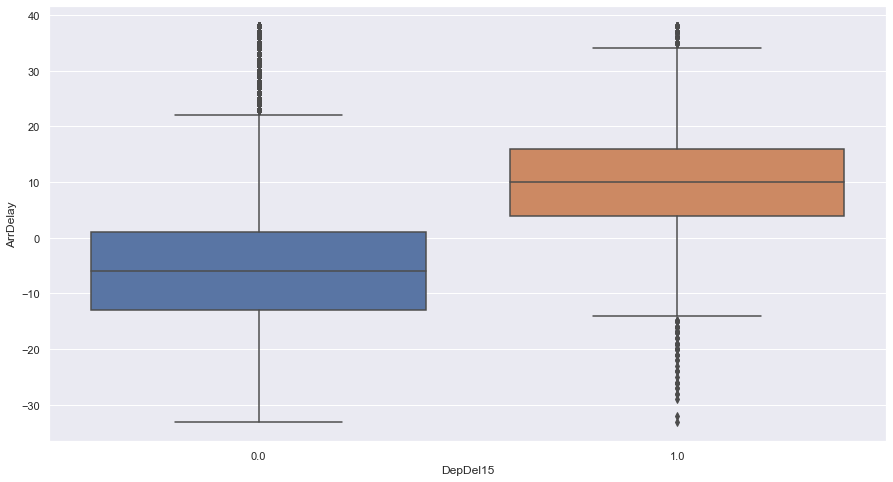

In [31]:
plot("DepDel15")

##### Which route (from origin airport to destination airport) has the most **late** arrivals?


In [32]:
df_flights['route']=df_flights['OriginAirportID'].map(str) + "-" + df_flights['DestAirportID'].map(str)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,15304-12478
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,14122-13232
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,14747-11278
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,13931-10397
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,13796-12191


In [33]:
import numpy as np

table = pd.pivot_table(df_flights, values='ArrDel15', index=["route","OriginAirportName","DestAirportName"],
                    aggfunc=np.sum,sort=False)
            
table.sort_values(by="ArrDel15",ascending=False)

,,,ArrDel15
route,OriginAirportName,DestAirportName,
14771-12892,San Francisco International,Los Angeles International,93
12892-14771,Los Angeles International,San Francisco International,73
12953-10397,LaGuardia,Hartsfield-Jackson Atlanta International,71
12892-12478,Los Angeles International,John F. Kennedy International,55
12953-11057,LaGuardia,Charlotte Douglas International,52
...,...,...,...
15016-13495,Lambert-St. Louis International,Louis Armstrong New Orleans International,0
14524-13303,Richmond International,Miami International,0
12478-12954,John F. Kennedy International,Long Beach Airport,0


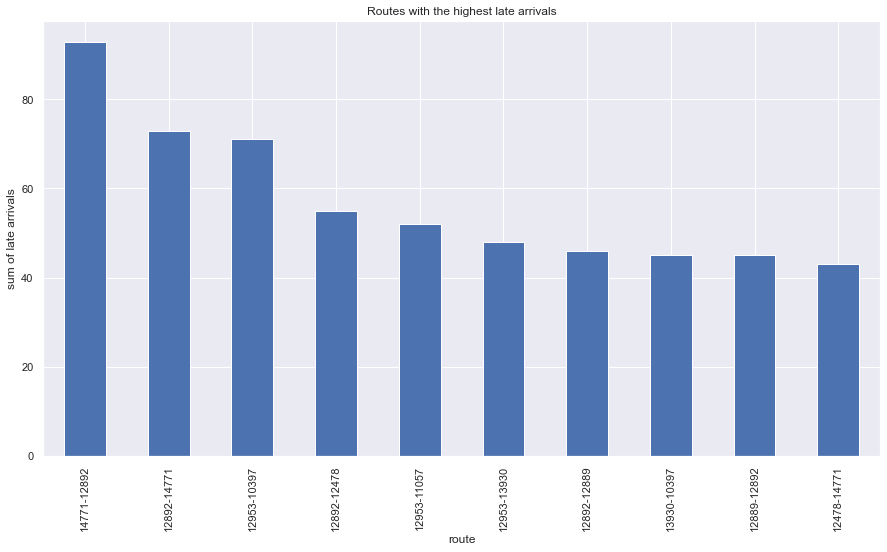

In [34]:
df_flights.groupby('route').sum()['ArrDel15'].sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Routes with the highest late arrivals")
plt.ylabel("sum of late arrivals");

##### Which route has the highest average arrival delay?

In [35]:
table = pd.pivot_table(df_flights, values='ArrDelay', index=["route","OriginAirportName","DestAirportName"],
                    aggfunc=np.mean,sort=False)
            
table.sort_values(by="ArrDelay",ascending=False)

,,,ArrDelay
route,OriginAirportName,DestAirportName,
13495-11278,Louis Armstrong New Orleans International,Ronald Reagan Washington National,24.500000
11042-14027,Cleveland-Hopkins International,Palm Beach International,18.000000
12478-14730,John F. Kennedy International,Louisville International-Standiford Field,18.000000
11042-14100,Cleveland-Hopkins International,Philadelphia International,10.833333
13244-11292,Memphis International,Denver International,9.758621
...,...,...,...
12451-13232,Jacksonville International,Chicago Midway International,-20.000000
14869-12264,Salt Lake City International,Washington Dulles International,-20.000000
13871-12953,Eppley Airfield,LaGuardia,-20.750000
